### Just playing with the introduced Probabilities for the first two moves in the first cell

X's first move at position (0, 0) with probability 31.00%:
  O's probability for position (0, 1): 14.86%
  O's probability for position (0, 2): 9.46%
  O's probability for position (1, 0): 6.76%
  O's probability for position (1, 1): 31.08%
  O's probability for position (1, 2): 20.27%
  O's probability for position (2, 0): 9.46%
  O's probability for position (2, 1): 0.00%
  O's probability for position (2, 2): 8.11%

X's first move at position (0, 1) with probability 6.00%:
  O's probability for position (0, 0): 29.21%
  O's probability for position (0, 2): 7.87%
  O's probability for position (1, 0): 5.62%
  O's probability for position (1, 1): 25.84%
  O's probability for position (1, 2): 16.85%
  O's probability for position (2, 0): 7.87%
  O's probability for position (2, 1): 0.00%
  O's probability for position (2, 2): 6.74%

X's first move at position (0, 2) with probability 1.00%:
  O's probability for position (0, 0): 27.96%
  O's probability for position (0, 1): 11.83%
  O's

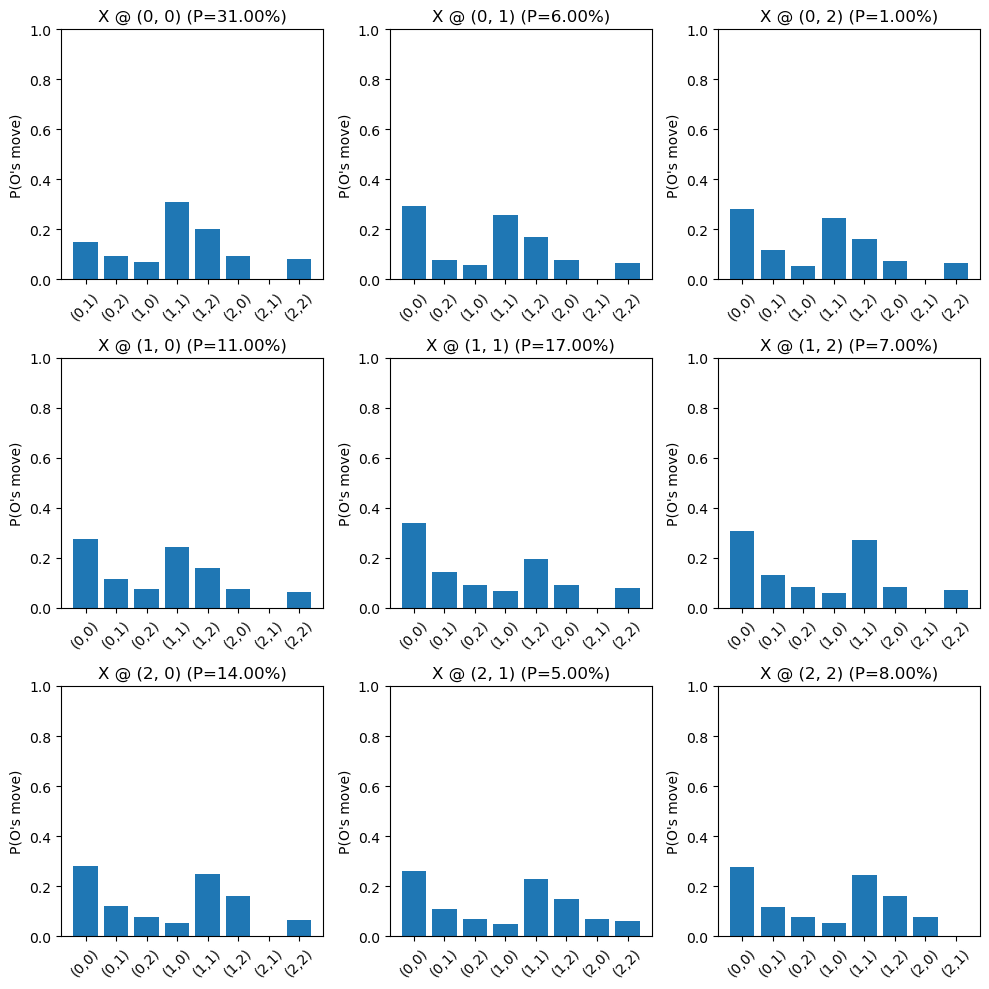

In [3]:
import numpy as np

# Initial distribution of X's first moves across the grid
x_moves = np.array([[31, 6, 1],
                    [11, 17, 7],
                    [14, 5, 8]])

# Initial distribution of O's first moves across the grid
o_moves = np.array([[26, 11, 7],
                    [5, 23, 15],
                    [7, 0, 6]])

# Function to calculate O's conditional probability distribution based on X's first move
def calculate_o_distribution(o_moves, x_move_pos):
    # Create a mask to exclude the position of X's move
    mask = np.ones_like(o_moves, dtype=bool)
    mask[x_move_pos] = False

    # Extracting the remaining available positions for O
    remaining_o_moves = o_moves[mask]
    total_o_moves = remaining_o_moves.sum()

    # Normalizing to get the probability distribution for O's remaining moves
    normalized_o_distribution = remaining_o_moves / total_o_moves
    return normalized_o_distribution

# Normalize X's distribution to get probabilities
total_x_moves = x_moves.sum()
x_move_probs = x_moves / total_x_moves

# Iterate over all positions for X's first move (3x3 grid) and calculate O's conditional move distribution
joint_distributions = {}
for i in range(3):
    for j in range(3):
        # Probability of X making the first move at position (i, j)
        x_prob = x_move_probs[i, j]

        # Calculate O's conditional distribution given X's first move
        o_distribution = calculate_o_distribution(o_moves, (i, j))

        # Store the joint distribution of both X and O's moves
        joint_distributions[(i, j)] = {
            'x_prob': x_prob,
            'o_distribution': o_distribution
        }

# Function to display the joint probability distributions
def display_joint_distributions(joint_distributions):
    for x_move, data in joint_distributions.items():
        print(f"X's first move at position {x_move} with probability {data['x_prob']:.2%}:")
        remaining_positions = [(i, j) for i in range(3) for j in range(3) if (i, j) != x_move]
        for idx, pos in enumerate(remaining_positions):
            print(f"  O's probability for position {pos}: {data['o_distribution'][idx]:.2%}")
        print()

display_joint_distributions(joint_distributions)

# Plotting the joint probabilities 
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        x_move = (i, j)
        data = joint_distributions[x_move]
        remaining_positions = [(r, c) for r in range(3) for c in range(3) if (r, c) != x_move]

        # Plot O's conditional move probabilities
        o_probs = data['o_distribution']
        labels = [f'({r},{c})' for (r, c) in remaining_positions]

        ax.bar(labels, o_probs)
        ax.set_title(f"X @ {x_move} (P={data['x_prob']:.2%})")
        ax.set_ylim(0, 1)
        ax.set_ylabel("P(O's move)")
        ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Introducing the Conditional Probabilities into the GameDataGenerator

In [4]:
import random
import pandas as pd
# from datetime import datetime

"""
The following code creates a simulated dataset of the game Tic-Tac-Toe G

Each position (pos00, pos01, etc.) corresponds to a cell on a 3x3 Tic-Tac-Toe board.

Board with Position Names:

  pos00 | pos01 | pos02
 -------+-------+-------
  pos10 | pos11 | pos12
 -------+-------+-------
  pos20 | pos21 | pos22

Example Board Representation:
-----------------------------
Each position can hold one of the following values:
- 1: Player X
- -1: Player O
- 0: Empty space

Example of a Tic-Tac-Toe board during a game:

  X  |     | O
-----+-----+-----
     |  X  |
-----+-----+-----
  O  |     | X

Board State:
------------
 pos00 = 1    # X (Player 1)
 pos01 = 0    # Empty
 pos02 = -1   # O (Player -1)

 pos10 = 0    # Empty
 pos11 = 1    # X (Player 1)
 pos12 = 0    # Empty

 pos20 = -1   # O (Player -1)
 pos21 = 0    # Empty
 pos22 = 1    # X (Player 1)

"""
import numpy as np
import random

# This is the joint distribution data based on 200 Games from Reddit User xandri123 https://www.reddit.com/r/dataisbeautiful/comments/8sybmo/i_played_tictactoe_with_200_people_data_of_their/
x_moves = np.array([[31, 6, 1],
                    [11, 17, 7],
                    [14, 5, 8]])

# Initial distribution of O's moves across the grid (to calculate conditionals)
o_moves = np.array([[26, 11, 7],
                    [5, 23, 15],
                    [7, 0, 6]])

# Normalizing X's distribution to get probabilities
total_x_moves = x_moves.sum()
x_move_probs = x_moves / total_x_moves

# Function to calculate O's conditional probability distribution based on X's first move
def calculate_o_distribution(o_moves, x_move_pos):
    mask = np.ones_like(o_moves, dtype=bool)
    mask[x_move_pos] = False
    remaining_o_moves = o_moves[mask]
    total_o_moves = remaining_o_moves.sum()
    normalized_o_distribution = remaining_o_moves / total_o_moves
    return normalized_o_distribution

# Updated simulate_game function of previous script to include joint probabilities and game result
def simulate_game():
    board = [0] * 9  # Empty board represented as a list of 9 cells
    states = []  # Store board states with the current player's move

    # X's first move based on joint distribution
    x_flat_index = np.random.choice(9, p=x_move_probs.flatten())
    x_first_move = divmod(x_flat_index, 3)  # Get the (i, j) position of X's first move
    board[x_flat_index] = 1  # X = 1

    # Store board state after X's move
    states.append({'state': list(board), 'player': 1})

    # Checking for winner after X's first move (kind of unnecessary but lol)
    result = check_winner(board)
    if result is not None:
        return states, result  # Return if the game is already won by X

    # Get O's conditional move distribution based on X's move
    o_distribution = calculate_o_distribution(o_moves, x_first_move)

    # Remaining positions for O after X's move checking the index
    remaining_positions = [(i, j) for i in range(3) for j in range(3) if (i, j) != x_first_move]
    remaining_indices = [i * 3 + j for (i, j) in remaining_positions]  # Flattened indices

    # O's move based on conditional distribution
    o_flat_index = np.random.choice(remaining_indices, p=o_distribution)
    board[o_flat_index] = -1  # O = -1 Player

    # Store board state after O's move
    states.append({'state': list(board), 'player': -1})

    # Check for winner after O's move
    result = check_winner(board)
    if result is not None:
        return states, result  # Return if the game is already won by O

    # Continue the game with random moves
    player = 1  # X goes next
    for turn in range(2, 9):  # Next 7 turns (9 moves total, 2 already taken)
        empty_positions = [i for i, pos in enumerate(board) if pos == 0]
        if not empty_positions:
            break
        move = random.choice(empty_positions)
        board[move] = player

        # Store board state after each random move
        states.append({'state': list(board), 'player': player})

        # Check for a winner after each move
        result = check_winner(board)
        if result is not None:
            return states, result  # Return if there's a winner or draw

        player = -player  # Switch player

    # If no winner, the game is a draw
    result = 0
    return states, result



# Check for win, lose, or draw (Same as befor)
def check_winner(board):
    winning_combinations = [(0,1,2), (3,4,5), (6,7,8), (0,3,6), (1,4,7), (2,5,8), (0,4,8), (2,4,6)]
    for (i, j, k) in winning_combinations:
        if board[i] == board[j] == board[k] != 0:
            print(f"Player {board[i]} wins with combination {i, j, k}")
            return board[i]  # return 1 for X win, -1 for O win
    if 0 not in board:
        print("It's a draw!")
        return 0
    return None  # Game ongoing

# Main function to run the game bit different to before due to data amount processing issues
def main():
    print("Hello from Tic-Tac-Toe data!")
    total_games = 1000  # Amount of games to simulate
    games = []

    # Just tracking wins/draws to get a feel for the numbers
    player_1_wins = 0
    player_minus_1_wins = 0
    draws = 0

    # Simulating the games and count results
    for _ in range(total_games):
        states, result = simulate_game()

        if result == 1:
            player_1_wins += 1
        elif result == -1:
            player_minus_1_wins += 1
        else:
            draws += 1

        for step, state_info in enumerate(states):
            state = state_info['state']
            player = state_info['player']

            games.append({
                'pos00': state[0], 'pos01': state[1], 'pos02': state[2],
                'pos10': state[3], 'pos11': state[4], 'pos12': state[5],
                'pos20': state[6], 'pos21': state[7], 'pos22': state[8],
                'player': player,
                'step': step,
                'result': result  # The final result of the game, not per step
            })

    print("\nSummary of Results:")
    print(f"Games played: {total_games}")
    print(f"Player 1 (X) wins: {player_1_wins}")
    print(f"Player -1 (O) wins: {player_minus_1_wins}")
    print(f"Draws: {draws}")

    df = pd.DataFrame(games)

    # Save the data to CSV
    csv_filename = "tic_tac_toe_games.csv"
    df.to_csv(csv_filename, index=False)
    print(f"\nData saved to {csv_filename}")


if __name__ == "__main__":
    main()

Hello from Tic-Tac-Toe data!
It's a draw!
Player 1 wins with combination (1, 4, 7)
Player 1 wins with combination (0, 3, 6)
Player 1 wins with combination (0, 3, 6)
Player 1 wins with combination (0, 4, 8)
Player 1 wins with combination (3, 4, 5)
Player 1 wins with combination (3, 4, 5)
Player 1 wins with combination (1, 4, 7)
Player 1 wins with combination (0, 1, 2)
Player -1 wins with combination (2, 4, 6)
Player 1 wins with combination (3, 4, 5)
Player -1 wins with combination (3, 4, 5)
Player 1 wins with combination (2, 4, 6)
Player 1 wins with combination (2, 4, 6)
Player 1 wins with combination (0, 4, 8)
Player -1 wins with combination (2, 4, 6)
Player -1 wins with combination (3, 4, 5)
It's a draw!
Player 1 wins with combination (2, 4, 6)
Player 1 wins with combination (6, 7, 8)
Player 1 wins with combination (2, 4, 6)
It's a draw!
Player 1 wins with combination (2, 4, 6)
Player 1 wins with combination (2, 4, 6)
Player -1 wins with combination (0, 1, 2)
Player 1 wins with combin